In [1]:
%load_ext autoreload
%autoreload 2

# PCA analisis

This notebook performs a PCA analysis of the ECFS-filtered data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from local_utils import pca_comp
import seaborn as sns

In [ ]:
df_ranked= pd.read_csv("ranked_df_142.csv", sep="\t")
df_topgenes = df_ranked.head(10).iloc[:,2:39]
df_topgenes.columns = df_topgenes.columns.str.replace('_mean','')
df_topgenes

,symbol,G7F,G7FNSen,G7FSen,G7M,G7MNSen,G7MSen,G7S,G7SNSen,G7SSen,...,G3SSen,Y3F,Y3FNSen,Y3FSen,Y3M,Y3MNSen,Y3MSen,Y3SNSen,Y3SSen,Y3S
0,Fabp3,1.108826,2.634362,7.292113,1.114405,0.000000,6.984152,3.854309,2.837667,4.025069,...,14.321997,1.372702,3.080218,6.496544,13.002197,0.000000,41.515963,1.080518,14.369990,3.202665
1,Gm38050,1.264172,4.773241,5.320926,0.000000,0.000000,0.966213,0.000000,0.000000,0.000000,...,3.904617,0.000000,0.371843,4.617450,1.449223,0.000000,3.798781,0.000000,1.655950,0.000000
2,Lncpint,53.471140,29.909353,7.166949,22.672213,9.201572,4.214950,15.337308,3.235999,0.604172,...,2.297985,31.290217,5.483048,6.133262,24.466720,5.408345,2.762375,1.169546,1.320244,34.169720
3,Pcnp,10.729073,14.389570,8.495852,10.363422,10.460677,8.948537,16.355583,13.633727,11.497847,...,9.674773,9.580695,9.364737,8.473849,10.821351,10.569788,6.111948,12.020820,9.713858,12.113660
4,Luc7l3,16.972573,14.361967,8.451580,11.245947,11.973417,9.386507,19.330207,20.186983,13.063754,...,15.373570,10.445293,8.347679,6.340688,15.855947,25.132637,6.403587,14.182250,12.527593,21.817175
5,Micalcl,0.000000,0.045431,0.214271,0.000000,0.120286,0.685069,0.000000,0.000000,0.889377,...,0.438844,0.000000,0.019417,0.333257,0.000000,0.000000,0.270568,0.000000,0.141918,0.000000
6,Ash1l,18.424960,13.046955,8.329151,12.811153,9.040402,7.524995,13.682937,11.960306,10.526299,...,6.232045,17.028977,8.066060,7.457584,9.994184,8.460669,5.803649,7.741266,7.172253,16.954535
7,AI427809,0.000000,1.228474,3.130106,0.000000,0.000000,2.969120,0.000000,0.000000,0.000000,...,3.175385,0.845789,5.560121,8.081729,1.805436,0.000000,10.820645,0.000000,1.259414,0.031789
8,Cdhr4,0.000000,0.000000,0.310584,0.000000,0.094287,0.000000,0.000000,0.000000,0.026277,...,0.182541,0.000000,0.000000,0.257265,0.000000,0.000000,0.000000,0.000000,0.169502,0.000000
9,Cd59a,0.549420,0.000000,1.651297,0.000000,1.350701,3.531358,7.777188,0.121548,11.251232,...,5.922007,0.000000,0.847302,1.592959,0.260174,0.000000,4.280093,0.740522,3.647594,7.698993


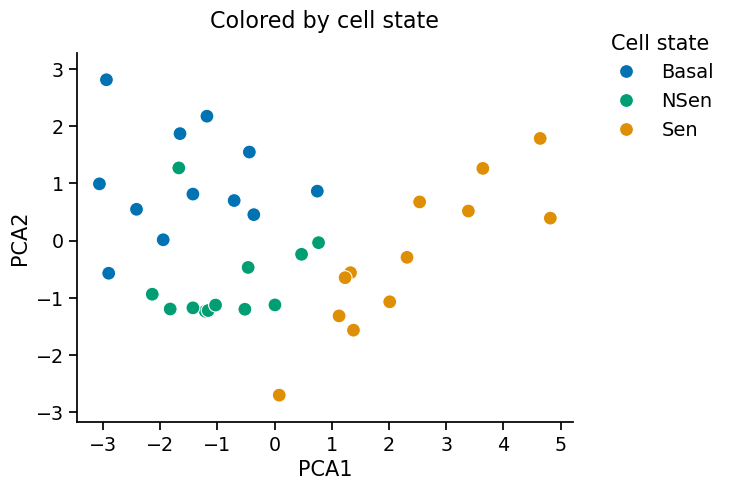

In [8]:
pca_df = pca_comp(df_topgenes, sorting='Cell state')

plt.figure()
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
    ax = sns.scatterplot(x="PCA1", y="PCA2",
                data=pca_df, 
                hue="Cell state",                   
                s=100,
                palette = sns.color_palette(['#0173b2','#029e73', '#de8f05'])) #from colorblind palette in order: blue, green, orange
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.title("Colored by cell state", pad = 18, fontsize = 16)
    
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.32, 1.1), frameon = False, title = "Cell state", fontsize = 14)
  
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False) #--> adjust to remove lines in figures

plt.gca().set_aspect('equal', 'datalim')

plt.savefig('figures/fig_PCA_ECFS_cell_state.pdf', dpi = 500, bbox_inches = 'tight',  transparent=True)

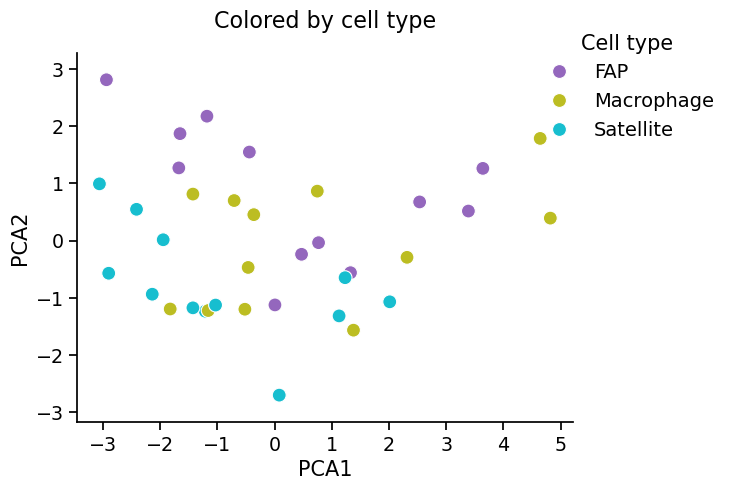

In [7]:
pca_df = pca_comp(df_topgenes, sorting='Cell type')

plt.figure()
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
    ax = sns.scatterplot(x="PCA1", y="PCA2",
                data=pca_df, 
                hue="Cell type",                   
                s=100,
                palette = sns.color_palette(['#9467bd','#bcbd22', '#17becf'])) #from colorblind palette in order: blue, green, orange
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.title("Colored by cell type", pad = 18, fontsize = 16)
    
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.32, 1.1), frameon = False, title = "Cell type", fontsize = 14)
  
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False) #--> adjust to remove lines in figures

plt.gca().set_aspect('equal', 'datalim')

plt.savefig('figures/fig_PCA_ECFS_cell_type.pdf', dpi = 500, bbox_inches = 'tight',  transparent=True)